In [117]:
import os
import re
import json
from time import time
import pandas as pd

import matplotlib.pyplot as plt

import phonenumbers
from phonenumbers.phonenumberutil import region_code_for_country_code
from phonenumbers.phonenumberutil import region_code_for_number
import pycountry

In [118]:
for path, subdirs, files in os.walk("f1/WA_Africa_202112/"):
    p = path
    files_list = files

In [119]:
all_lines = []

for i in files_list:
    with open(os.path.join(p, i), mode='r', encoding='utf-8') as f:
        lines = f.readlines()
        all_lines += lines

In [120]:
lines_2 = []
for j in all_lines:
    if "Ashish Jain" in j:
        pass
    else:
        lines_2.append(j)

In [121]:
lines_3 = []
lines_wags = []
for i in lines_2:
    if "https://chat.whatsapp.com/" in i:
        lines_wags.append(i)
    else:
        lines_3.append(i)

In [122]:
%%time
phone_numbers = []
lines_temp = []
for i in lines_3:
    
    x = re.findall(r"[+][0-9]{3}\s[0-9][0-9][0-9]\s[0-9]{6}", i) # +123 123 123456
    y = re.findall(r"[+][0-9][0-9][0-9]\s[0-9]{9}", i) # +254 111222333
    z = re.findall(r"[+][0-9][0-9][0-9]\s[0-9][0-9]\s[0-9][0-9][0-9]\s[0-9][0-9][0-9][0-9]", i) # +258 12 345 6789 
    a = re.findall(r"[+][0-9][0-9]\s[0-9][0-9][0-9]\s[0-9]{7}", i) # +92 123 1234567
    b = re.findall(r"[+][0-9][0-9][0-9]\s[0-9][0-9][0-9]\s[0-9][0-9][0-9]\s[0-9][0-9][0-9][0-9]", i) # +234 123 456 1234
    c = re.findall(r"[+][0-9][0-9]\s[0-9][0-9][0-9][0-9]\s[0-9][0-9][0-9][0-9][0-9][0-9]", i) # +44 1234 123456
    d = re.findall(r"[0][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]", i) # 0123412345
    e = re.findall(r"[+][0-9]{11}", i) # +12345678901
    f = re.findall(r"[+][0-9][0-9][0-9]\s[0-9][0-9][0-9][-][0-9][0-9][0-9][0-9][0-9][0-9]", i) # +212 123-123456
    g = re.findall(r"[+][0-9]\s[\(][0-9][0-9][0-9][\)]\s[0-9]{3}[-][0-9]{4}", i) # +1 (123) 123-1234
    h = re.findall(r"[+][0-9][0-9]\s[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]", i) # +31 12345671234
    i2 = re.findall(r"[+][0-9]{2}\s[0-9]{5}\s[0-9]{5}", i) # +91 12345 12345
    j = re.findall(r"[+][0-9]{2}\s[0-9]{3}[-][0-9]{4}[-][0-9]{5}", i) # +62 123-1234-12345
    k = re.findall(r"[+][0-9][0-9]\s[0-9][0-9][0-9]\s[0-9][0-9][0-9]\s[0-9][0-9]\s[0-9][0-9]", i) # +90 123 123 27 12
    l = re.findall(r"[+][0-9]{2}\s[0-9]{4}\s[0-9]{3}\s[0-9]{3}", i) # +91 1234 123 123
    m = re.findall(r"[+][0-9]{2}\s[0-9]{2}\s[0-9]{3}\s[0-9]{4}", i) # +27 65 123 1234
    n = re.findall(r"[+][0-9]{5}[-][0-9]{7}", i) # +12345-1234567
    o = re.findall(r"[+][0-9]{3}\s[0-9]{4}\s[0-9]{4}", i) # +968 1234 1234
    p = re.findall(r"[+][0-9]{12}", i) # +123451234512
    q = re.findall(r"[+][0-9]{3}\s[0-9]{8}", i) # +229 12345678
    r = re.findall(r"[+][0-9]{2}\s[0-9]{3}\s[0-9]{3}\s[0-9]{3}", i) # +40 123 123 123 
    s = re.findall(r"[+][0-9]{2}\s[0-9]{3}\s[0-9]{3}\s[0-9]{4}", i) # +98 123 123 1234
    t = re.findall(r"[+][0-9]{3}\s[0-9]{3}\s[0-9]{3}\s[0-9]{3}", i) # +123 123 123 123
    u = re.findall(r"[+][0-9]{3}\s([0-9]{2}\s){3}[0-9]{2}", i) # +228 12 34 56 78
    v = re.findall(r"[+][0-9]{3}\s[0-9]{2}\s[0-9]{6}", i) # +232 30 123456
    w2 = re.findall(r"[+][0-9]{3}\s[0-9]{3}\s[0-9]{2}\s[0-9]{2}\s[0-9]{2}", i) # +265 123 45 67 89
    x2 = re.findall(r"[+][0-9]{3}\s[0-9]{2}\s[0-9]{3}\s[0-9]{3}", i) # # +267 12 123 123
    
    w = x + y + z + a + b + c + d + e + f + g + h + i2 + j + k + l + m + n + o + p + q + r + s + t + u + v + w2 + x2
    
    phone_numbers += w
    lines_temp += [i for j in range(len(w))]

Wall time: 3.2 s


In [123]:
ts = str(time())

print("Before:", len(phone_numbers))
phone_numbers = sorted(set(phone_numbers))
print("After:", len(phone_numbers))
with open(file = "phone_numbers_" + ts + ".txt", mode="w", encoding = "utf-8") as f:
    f.write(json.dumps(phone_numbers))

Before: 29749
After: 2354


In [124]:
phone_numbers_2 = [i.replace("\xa0", " ") for i in phone_numbers]

In [137]:
phn_num_list = []
cntry = []

for i in phone_numbers_2:
    try:
        pn = phonenumbers.parse(i)
        # print(region_code_for_country_code(pn.country_code))

        country = pycountry.countries.get(alpha_2 = region_code_for_number(pn))
        
        phn_num_list.append(i)
        cntry.append(country.name)
    except:
        pass

In [138]:
df1 = pd.DataFrame({
    "phn": phn_num_list,
    "cntry": cntry
})

In [139]:
df2 = df1.groupby('cntry').count()

In [140]:
def plot_pie(labels, sizes, title = ""):
    colors = ['#f47961', '#f0c419', '#255c61', '#78909c', '#6ad4cf', '#17aee8', '#5c6bc0', '#444b6e', '#ef4c60', '#744593', 
              '#ee5691', '#9ccc65', '#708b75', '#d1cb65', '#0d8de1', '#a4554b', '#694f5d', '#45adb3', '#26a69a', '#bdc7cc', ]
    colors = colors[0:len(labels)]
    
    explode = explode = [0.1] + [0]*1000  # explode 1st slice
    explode = explode[0:len(labels)]
    
    # Plot
    plt.figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

In [141]:
top_10 = sorted(df2.phn.values)[::-1][0:9]

In [142]:
df2.head()

,phn
cntry,
Afghanistan,1
Algeria,1
Australia,1
"Bolivia, Plurinational State of",1
Botswana,3


In [143]:
df2 = df2.reset_index()
df2.head()

,cntry,phn
0,Afghanistan,1
1,Algeria,1
2,Australia,1
3,"Bolivia, Plurinational State of",1
4,Botswana,3


In [144]:
def get_cntry_label(in_row):
    if(in_row['phn'] in top_10):
        return in_row['cntry']
    else:
        return 'Others'

In [145]:
df2['cntry_lbl'] = df2.apply(get_cntry_label, axis = 1)

In [146]:
df3 = df2[['cntry_lbl', 'phn']].groupby('cntry_lbl').sum('phn')

In [147]:
df3

,phn
cntry_lbl,
Ghana,26
India,22
Kenya,777
Nigeria,58
Others,96
Pakistan,157
"Tanzania, United Republic of",160
Uganda,834
United Arab Emirates,24


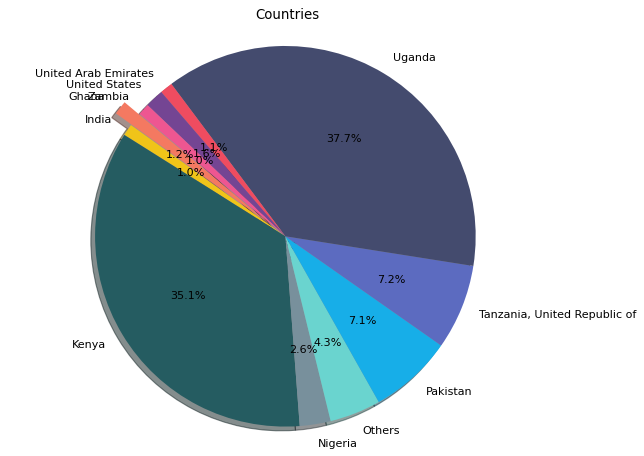

In [148]:
plot_pie(df3.index, df3.phn.values, 'Countries')